In [1]:
# Note: We have cleansed the data set to take into account days on which the turbines were inactive.
# This has been determined to be days on which wind speeds were greater than 5mph, however, no power
# was generated. This was deeemed prudent in order to give a more accurate result.

import pandas as pd
import seaborn as sns

df = pd.read_csv('powerproduction.csv')
col=['speed','power']

# Let's see if the data has loaded correctly. If so, the headings and first 10
# rows will show - yes they do.
print(df.head(n=11))

    speed  power
0   0.000  0.000
1   0.125  0.000
2   0.150  0.000
3   0.225  0.000
4   0.275  0.000
5   0.325  4.331
6   0.400  5.186
7   0.450  3.826
8   0.501  1.048
9   0.526  5.553
10  0.551  6.498


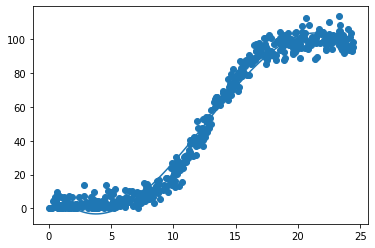

0.9785340997342342


In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

# Take the two variables from our data set.
production = df[["speed", "power"]].dropna()

x = production["speed"].to_numpy()
y = production["power"].to_numpy()

model = np.poly1d(np.polyfit(x, y, 3))
line = np.linspace(1, 22, 100)

# Draw the line of Polynomial Regression:  
plt.scatter(x, y)
plt.plot(line, model(line))
plt.show()

# Show the r-squared value. This ranges from 0 to 1, where 0 means no relationship and 1 means 100% related.
print(r2_score(y, model(x)))

In [17]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def data():
    X_train, X_val, y_train, y_val  = train_test_split(df.iloc[:, :1].values,
                                                       df.iloc[:, 1].values,
                                                       test_size=0.2,
                                                       random_state=1340)
       
    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = data()

In [18]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

poly_reg_model = LinearRegression().fit(X_poly, y_train)



poly_model = joblib.dump(poly_reg_model, 'themodel')

y_pred = poly_reg_model.predict(poly_reg.fit_transform(X_val))

themodel = joblib.load('themodel')

In [21]:
y_pred(15)

TypeError: 'numpy.ndarray' object is not callable